# Đồ án học phần nhóm 8 môn Lập trình phân tích dữ liệu

Nội dung: Thống kê việc làm và mức lương từng nghề tại 1 số bang ở Mĩ

Thành viên nhóm:
+ Trần Phi Phát - 20057961
+ Hồ Xuân Bi - 20056951
+ Bùi Hoàng Sơn - 20053181
+ Dương Quang Huy - 20018991

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
import plotly.graph_objects as go
import cv2

from dash.dependencies import Input, Output, State
from dash import Dash, html, dcc

# Đọc dữ liệu và tìm hiểu dữ liệu

## Thay đổi tên thuộc tính để dễ dàng tương tác với dữ liệu

In [2]:
df = pd.read_csv('./Occupational_Employment_and_Wage_Statistics.csv')

In [3]:
df.columns = ['Loại Khu vực', 'Khu vực', 'Tên Khu vực', 'Mã Nghề nghiệp Tiêu chuẩn', 'Chức danh nghề nghiệp', 
              'Việc làm', 'Mức lương trung bình', 'Mức lương trung vị', 'Mức lương đầu vào', 'Mức lương có kinh nghiệm']

In [4]:
df.head()

Loại Khu vực  Khu vực     Tên Khu vực Mã Nghề nghiệp Tiêu chuẩn  \
0             1       36  New York State                   00-0000   
1             1       36  New York State                   11-0000   
2             1       36  New York State                   11-1011   
3             1       36  New York State                   11-2033   
4             1       36  New York State                   11-1021   

             Chức danh nghề nghiệp   Việc làm  Mức lương trung bình  \
0           Total, All Occupations  8668580.0                 73330   
1           Management Occupations   515320.0                162180   
2                 Chief Executives     4100.0                269140   
3             Fundraising Managers     2030.0                179710   
4  General and Operations Managers   194910.0                150720   

   Mức lương trung vị  Mức lương đầu vào  Mức lương có kinh nghiệm  
0             50850.0              33220                   93390.0  
1            140030.0              77280                  204630.0  
2                 NaN             128150                       NaN  
3            167620.0             111650                  213740.0  
4            129810.0              64700                  193730.0

In [5]:
df.describe()

Loại Khu vực      Khu vực      Việc làm  Mức lương trung bình  \
count   7353.000000  7353.000000  5.957000e+03           7353.000000   
mean       9.013464     8.790426  8.610591e+03          74439.239766   
std        2.811876     9.928841  1.303420e+05          44137.914511   
min        1.000000     1.000000  2.000000e+01          28870.000000   
25%       10.000000     3.000000  1.600000e+02          44770.000000   
50%       10.000000     6.000000  4.700000e+02          63080.000000   
75%       10.000000     9.000000  1.910000e+03          88790.000000   
max       10.000000    36.000000  8.668580e+06         378750.000000   

       Mức lương trung vị  Mức lương đầu vào  Mức lương có kinh nghiệm  
count         7226.000000        7353.000000               7266.000000  
mean         65893.186549       48833.533524              83887.429122  
std          31617.697489       24025.098911              46042.027347  
min          27456.000000       27456.000000              29450.000000  
25%          40100.000000       32530.000000              50402.500000  
50%          61150.000000       41940.000000              72645.000000  
75%          81347.500000       57030.000000             102902.500000  
max         214610.000000      309870.000000             374020.000000

# Trực quan một số thuộc tính của dữ liệu

Do thuộc tính `Tên khu vực` của dữ liệu có các biến phân loại khác nhau nên nhóm chỉ chọn khu vực `New York State`. Và cũng chỉ chọn một trong các thuộc tính tương quan như `Việc làm`, `Mức lương trung bình`, `Mức lương trung vị`, `Mức lương đầu vào`, `Mức lương có kinh nghiệm` để đại diện trực quan và từ đó suy ra các khu vực và thuộc tính còn lại trong Dashboard.

## Top 20 ngành có nhiều nhân sự nhất khu vực `New York State`

In [6]:
df_kv = df[df["Tên Khu vực"] == "New York State"]
df_kv.head()

Loại Khu vực  Khu vực     Tên Khu vực Mã Nghề nghiệp Tiêu chuẩn  \
0             1       36  New York State                   00-0000   
1             1       36  New York State                   11-0000   
2             1       36  New York State                   11-1011   
3             1       36  New York State                   11-2033   
4             1       36  New York State                   11-1021   

             Chức danh nghề nghiệp   Việc làm  Mức lương trung bình  \
0           Total, All Occupations  8668580.0                 73330   
1           Management Occupations   515320.0                162180   
2                 Chief Executives     4100.0                269140   
3             Fundraising Managers     2030.0                179710   
4  General and Operations Managers   194910.0                150720   

   Mức lương trung vị  Mức lương đầu vào  Mức lương có kinh nghiệm  
0             50850.0              33220                   93390.0  
1            140030.0              77280                  204630.0  
2                 NaN             128150                       NaN  
3            167620.0             111650                  213740.0  
4            129810.0              64700                  193730.0

Các thuộc tính số lượng trong bộ dữ liệu vẫn còn các giá trị null nên nhóm tiến hành xử lý trước khi vẽ biểu đồ. Còn các giá trị outlier không được xử lý trong bộ dữ liệu này do mức lương của mỗi ngành có thể chêch lệch nhau rất lớn là điều tất nhiên.

In [7]:
# Xử lý giá trị null thuộc tính Việc làm
df_kv["Việc làm"].isnull().sum()

103

In [8]:
df_kv_vieclam = df_kv.dropna(subset=["Việc làm"])
df_kv_vieclam["Việc làm"].isnull().sum()

0

In [9]:
df_kv_vieclam_top20_vieclam = df_kv_vieclam.sort_values(by = "Việc làm", ascending=False).iloc[1:21]

In [10]:
fig1 = px.bar(
    df_kv_vieclam_top20_vieclam, 
    x = "Việc làm", 
    y = "Chức danh nghề nghiệp", 
    text = "Việc làm", 
    color = "Chức danh nghề nghiệp"
)

fig1.update_traces(texttemplate = "%{text:.2s}", textposition = "outside")
fig1.update_layout(uniformtext_minsize = 8)
fig1.update_layout(yaxis_tickangle = -45)
fig1.update_yaxes(visible=False, showticklabels=False)

fig1.show()

### Tương quan mức lương trung bình, trung vị, mức lương đầu vào và mức lương có kinh nghiệm

In [11]:
df_kv_luong = df_kv.dropna(subset=['Mức lương trung bình', 'Mức lương trung vị', 
                                     'Mức lương đầu vào', 'Mức lương có kinh nghiệm'])

In [12]:
fig2 = go.Figure()
fig2.add_trace(go.Box(y = df_kv_luong["Mức lương trung bình"], boxpoints = "all", name = "Mức lương trung bình",
                        fillcolor = "blue", jitter = 0.5,
                        whiskerwidth = 0.2))
fig2.add_trace(go.Box(y = df_kv_luong["Mức lương trung vị"], boxpoints = "all", name = "Mức lương trung vị",
                        fillcolor = "red", jitter = 0.5,
                        whiskerwidth = 0.2))
fig2.add_trace(go.Box(y = df_kv_luong["Mức lương đầu vào"], boxpoints = "all", name = "Mức lương đầu vào",
                        fillcolor = "green", jitter = 0.5,
                        whiskerwidth = 0.2))
fig2.add_trace(go.Box(y = df_kv_luong["Mức lương có kinh nghiệm"], boxpoints = "all", name = "Mức lương có kinh nghiệm",
                        fillcolor = "orange", jitter = 0.5,
                        whiskerwidth = 0.2))
fig2.update_xaxes(visible=False, showticklabels=False);
fig2.update_traces(boxpoints=False)

fig2.show()

### Tương quan việc làm và mức lương

In [13]:
df_kv_vieclam_luong = df_kv.dropna(subset=['Việc làm', 'Mức lương trung bình', 'Mức lương trung vị', 
                                             'Mức lương đầu vào', 'Mức lương có kinh nghiệm'])

In [14]:
df_kv_vieclam_luong = df_kv_vieclam_luong.iloc[1:]

In [15]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương trung bình'],
                mode = "markers", name = 'Mức lương trung bình', opacity=0.7))
fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương trung vị'],
                mode = "markers", name = 'Mức lương trung vị', opacity=0.7))
fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương đầu vào'],
                mode = "markers", name = 'Mức lương đầu vào', opacity=0.7))
fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương có kinh nghiệm'],
                mode = "markers", name = 'Mức lương có kinh nghiệm', opacity=0.7, marker_color='rgb(255, 0, 0)'))
fig3.update_traces(marker_line_width = 2, marker_size  = 10)
fig3.update_layout(
    xaxis_title="Mức lương",
    yaxis_title="Việc làm"
)

fig3.show()

## Trực quan sự tương quan giữa các khu vực

### So sánh việc làm

In [16]:
df["Tên Khu vực"].unique()

array(['New York State', 'Capital Region', 'Central New York',
       'Finger Lakes', 'Hudson Valley', 'Long Island', 'Mohawk Valley',
       'New York City', 'North Country', 'Southern Tier',
       'Western New York'], dtype=object)

In [17]:
df_total = df[df["Chức danh nghề nghiệp"] == "Total, All Occupations"]
df_total

Loại Khu vực  Khu vực       Tên Khu vực Mã Nghề nghiệp Tiêu chuẩn  \
0                1       36    New York State                   00-0000   
810             10        1    Capital Region                   00-0000   
1481            10        2  Central New York                   00-0000   
2135            10        3      Finger Lakes                   00-0000   
2826            10        4     Hudson Valley                   00-0000   
3503            10        5       Long Island                   00-0000   
4204            10        6     Mohawk Valley                   00-0000   
4775            10        7     New York City                   00-0000   
5497            10        8     North Country                   00-0000   
6030            10        9     Southern Tier                   00-0000   
6653            10       10  Western New York                   00-0000   

       Chức danh nghề nghiệp   Việc làm  Mức lương trung bình  \
0     Total, All Occupations  8668580.0                 73330   
810   Total, All Occupations   492610.0                 62430   
1481  Total, All Occupations   319470.0                 59350   
2135  Total, All Occupations   515540.0                 58830   
2826  Total, All Occupations   864010.0                 68990   
3503  Total, All Occupations  1206040.0                 70780   
4204  Total, All Occupations   177460.0                 54280   
4775  Total, All Occupations  3972720.0                 84110   
5497  Total, All Occupations   139150.0                 54870   
6030  Total, All Occupations   239300.0                 58690   
6653  Total, All Occupations   582760.0                 57510   

      Mức lương trung vị  Mức lương đầu vào  Mức lương có kinh nghiệm  
0                50850.0              33220                   93390.0  
810              49680.0              31570                   77870.0  
1481             48820.0              30760                   73640.0  
2135             48130.0              30120                   73190.0  
2826             49910.0              33230                   86870.0  
3503             50270.0              33630                   89360.0  
4204             40450.0              29610                   66620.0  
4775             62820.0              35240                  108550.0  
5497             46210.0              29760                   67420.0  
6030             48430.0              30360                   72860.0  
6653             47760.0              30180                   71180.0

In [18]:
fig4 = px.pie(
    df_total, 
    values = "Việc làm", 
    names = "Tên Khu vực",
    color_discrete_sequence = px.colors.cyclical.HSV
)

fig4.show()

### So sánh việc làm với các mức lương

In [19]:
df_total_vieclam = df_total.sort_values(by = "Việc làm")

In [20]:
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x = df_total_vieclam["Việc làm"], y = df_total_vieclam["Mức lương trung bình"],
             mode = "lines+markers", name = "Mức lương trung bình"))
fig6.add_trace(go.Scatter(x = df_total_vieclam["Việc làm"], y = df_total_vieclam["Mức lương trung vị"],
             mode = "lines+markers", name = "Mức lương trung vị"))
fig6.add_trace(go.Scatter(x = df_total_vieclam["Việc làm"], y = df_total_vieclam["Mức lương đầu vào"],
             mode = "lines+markers", name = "Mức lương đầu vào"))
fig6.add_trace(go.Scatter(x = df_total_vieclam["Việc làm"], y = df_total_vieclam["Mức lương có kinh nghiệm"],
             mode = "lines+markers", name = "Mức lương có kinh nghiệm"))
fig6.update_layout(xaxis_title = "Việc làm", yaxis_title = "Mức lương")

fig6.show()

## Corr() heatmap

In [21]:
df_corr = df[['Việc làm', 'Mức lương trung bình', 'Mức lương trung vị', 'Mức lương đầu vào', 'Mức lương có kinh nghiệm']].corr()
x = list(df_corr.columns)
y = list(df_corr.index)
z = df_corr.values
fig_corr = ff.create_annotated_heatmap(
    z,
    x=x,
    y=y,
    annotation_text=np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Reds'
)

fig_corr.show()

Đánh giá bộ dữ liệu: dữ liệu có ít thuộc tính phân loại nên việc vẽ biểu đồ chưa được đa dạng.

# Xây dựng Dashboard từ Dataset

Nhóm chọn đại diện 5 trên 6 biểu đồ đặc trưng nhất để tiến hành vẽ Dashboard.

## Các bước xây dựng trang Dashboard

Bước 1: Tạo khung và chỉnh khung. 

Bước 2: Chèn biểu đồ và căng chỉnh biểu đồ vào khung.

Bước 3: Tạo các nút tương tác để lựa chọn.

Bước 4: Gọi callback cho biểu đồ để người dùng dễ dàng tương tác.

In [22]:
vars_khuvuc = list(df['Tên Khu vực'].unique())
vars_thuoctinh = ['Việc làm', 'Mức lương trung bình', 'Mức lương trung vị', 'Mức lương đầu vào', 'Mức lương có kinh nghiệm']

app = Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

@app.callback(
    Output('fig1-chart', 'figure'),
    Output('fig1-title', 'children'),
    Input('my-button', 'n_clicks'),
    State('khu-vuc', 'value'),
    State("thuoc-tinh-mot-khu-vuc", "value")
)
def update_fig1(n_clicks, khuvuc_pick, thuoctinh1khuvuc_pick):
    df_kv = df[df["Tên Khu vực"] == khuvuc_pick]
    df_kv_thuoctinh1khuvuc = df_kv.dropna(subset=[thuoctinh1khuvuc_pick])
    df_kv_thuoctinh1khuvuc_top20 = df_kv_thuoctinh1khuvuc.sort_values(by = thuoctinh1khuvuc_pick, ascending=False).iloc[1:21]
    fig1 = px.bar(
        df_kv_thuoctinh1khuvuc_top20 , 
        x = thuoctinh1khuvuc_pick, 
        y = "Chức danh nghề nghiệp", 
        text = thuoctinh1khuvuc_pick, 
        color = "Chức danh nghề nghiệp"
    )

    fig1.update_traces(texttemplate = "%{text:.2s}", textposition = "outside")
    fig1.update_layout(uniformtext_minsize = 8)
    fig1.update_layout(yaxis_tickangle = -45)
    fig1.update_yaxes(visible=False, showticklabels=False)
    
    title_fig1 = "Top 20 ngành ở " + khuvuc_pick + " có " + thuoctinh1khuvuc_pick + " cao nhất"
    
    return fig1, title_fig1

@app.callback(
    Output('fig2-chart', 'figure'),
    Output('fig2-title', 'children'),
    Input('my-button', 'n_clicks'),
    State('khu-vuc', 'value')
)
def update_fig2(n_clicks, khuvuc_pick):
    df_kv = df[df["Tên Khu vực"] == khuvuc_pick]
    df_kv_vieclam = df_kv.dropna(subset=["Việc làm"])
    df_kv_luong = df_kv.dropna(subset=['Mức lương trung bình', 'Mức lương trung vị', 'Mức lương đầu vào', 'Mức lương có kinh nghiệm'])

    fig2 = go.Figure()
    fig2.add_trace(go.Box(y = df_kv_luong["Mức lương trung bình"], boxpoints = "all", name = "Mức lương trung bình",
                        fillcolor = "blue", jitter = 0.5,
                        whiskerwidth = 0.2))
    fig2.add_trace(go.Box(y = df_kv_luong["Mức lương trung vị"], boxpoints = "all", name = "Mức lương trung vị",
                        fillcolor = "red", jitter = 0.5,
                        whiskerwidth = 0.2))
    fig2.add_trace(go.Box(y = df_kv_luong["Mức lương đầu vào"], boxpoints = "all", name = "Mức lương đầu vào",
                        fillcolor = "green", jitter = 0.5,
                        whiskerwidth = 0.2))
    fig2.add_trace(go.Box(y = df_kv_luong["Mức lương có kinh nghiệm"], boxpoints = "all", name = "Mức lương có kinh nghiệm",
                        fillcolor = "orange", jitter = 0.5,
                        whiskerwidth = 0.2))
    fig2.update_xaxes(visible=False, showticklabels=False);
    fig2.update_traces(boxpoints=False)
    
    title_fig2 = "Tương quan giữa các mức lương của khu vực ở " + khuvuc_pick
    
    return fig2, title_fig2

@app.callback(
    Output('fig3-chart', 'figure'),
    Output('fig3-title', 'children'),
    Input('my-button', 'n_clicks'),
    State('khu-vuc', 'value')
)
def update_fig3(n_clicks, khuvuc_pick):
    df_kv = df[df["Tên Khu vực"] == khuvuc_pick]
    df_kv_vieclam = df_kv.dropna(subset=["Việc làm"])
    df_kv_vieclam_luong = df_kv.dropna(subset=['Việc làm', 'Mức lương trung bình', 'Mức lương trung vị', 'Mức lương đầu vào', 'Mức lương có kinh nghiệm'])
    df_kv_vieclam_luong = df_kv_vieclam_luong.iloc[1:]
    fig3 = go.Figure()
    fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương trung bình'],
                 mode = "markers", name = 'Mức lương trung bình', opacity=0.7))
    fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương trung vị'],
                 mode = "markers", name = 'Mức lương trung vị', opacity=0.7))
    fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương đầu vào'],
                 mode = "markers", name = 'Mức lương đầu vào', opacity=0.7))
    fig3.add_trace(go.Scatter(y = df_kv_vieclam_luong['Việc làm'], x = df_kv_vieclam_luong['Mức lương có kinh nghiệm'],
                 mode = "markers", name = 'Mức lương có kinh nghiệm', opacity=0.7, marker_color='rgb(255, 0, 0)'))
    fig3.update_traces(marker_line_width = 2, marker_size  = 10)
    fig3.update_layout(
        xaxis_title="Mức lương",
        yaxis_title="Việc làm"
    )
    
    title_fig3 = "Tương quan việc làm và mức lương của khu vực ở " + khuvuc_pick
    
    return fig3, title_fig3

@app.callback(
    Output('fig4-chart', 'figure'),
    Output('fig4-title', 'children'),
    Input('my-button', 'n_clicks'),
    State('thuoc-tinh-mot-khu-vuc', 'value')
)
def update_fig4(n_clicks, thuoctinh1khuvuc_pick):
    df_total = df[df["Chức danh nghề nghiệp"] == "Total, All Occupations"]
    fig4 = px.pie(
        df_total, 
        values = thuoctinh1khuvuc_pick, 
        names = "Tên Khu vực",
        color_discrete_sequence = px.colors.cyclical.HSV
    )
    
    title_fig4 = "So sánh " + thuoctinh1khuvuc_pick + " giữa các khu vực"
    
    return fig4, title_fig4

@app.callback(
    Output('fig5-chart', 'figure'),
    Input('my-button2', 'n_clicks'),
    State('my-corr-picker', 'value')
)
def update_fig5(n_clicks, corr_pick):
    df_corr = df[corr_pick].corr()
    x = list(df_corr.columns)
    y = list(df_corr.index)
    z = df_corr.values
    fig_corr = ff.create_annotated_heatmap(
        z,
        x=x,
        y=y,
        annotation_text=np.around(z, decimals=2),
        hoverinfo='z',
        colorscale='Reds'
    )

    return fig_corr

sidebar = html.Div(
    [
        dbc.Row(
            [
                html.H5(
                    'Tương quan khu vực với các thuộc tính',
                    style = {
                        "textAlign": "center",
                        "margin-top": "1.25vh"
                    }
                )
            ],
            style={"height": "5vh"},
            className='bg-primary text-white font-italic'
        ),
        
        dbc.Row(
            [
                html.Div(
                    [
                        html.P(
                            "Chọn khu vực:",
                            className='font-weight-bold'
                        ),
                    
                        dcc.Dropdown(
                            id="khu-vuc", 
                            multi=False, 
                            value="New York State",
                            options=
                                [
                                    {'label': x, 'value': x} for x in vars_khuvuc
                                ],
                            style={"textAlign": "center"}
                        ),
                        
                        html.P(
                            "Chọn thuộc tính:",
                            className='font-weight-bold'
                        ),
                        
                        dcc.Dropdown(
                            id="thuoc-tinh-mot-khu-vuc", 
                            multi=False, 
                            value="Việc làm",
                            options=[{'label': x, 'value': x} for x in vars_thuoctinh],
                            style = {"textAlign": "center"}
                        ),
                        
                        html.Button(
                            id='my-button', 
                            n_clicks=0, 
                            children='apply',
                            className='bg-dark text-white',
                            style = {"margin-top": "2vh"}
                        ),
                        
                        html.Hr(),
                        
                        html.P(
                            'Continuous Variables for Correlation Matrix',
                            className='font-weight-bold'
                        ),
                        
                        dcc.Dropdown(
                            id='my-corr-picker', 
                            multi=True,
                            value=['Việc làm', 'Mức lương trung bình', 'Mức lương trung vị', 'Mức lương đầu vào', 'Mức lương có kinh nghiệm'],
                            options=['Việc làm', 'Mức lương trung bình', 'Mức lương trung vị', 'Mức lương đầu vào', 'Mức lương có kinh nghiệm'],
                            style = {"textAlign": "center"}
                        ),
                        
                        html.Button(
                            id='my-button2', 
                            n_clicks=0, 
                            children='apply',
                            className='bg-dark text-white',
                            style = {"margin-top": "2vh", "margin-bottom": "3vh"}
                        )
                    ],
                    style = {"textAlign": "center"}
                )
            ]
        ),
        
        dbc.Row(
            dbc.Col(
                [
                    html.Div(
                        [    
                            dcc.Graph(
                                id="fig5-chart"
                            )
                        ],
                        
                    )
                ]
            )
        )
    ]   
)

content = html.Div(
    [
        dbc.Row(
            [
                dbc.Col(
                    html.Div(
                        [
                            html.P(
                                id="fig1-title"
                            ),
                                
                            dcc.Graph(
                                id="fig1-chart"
                            )
                        ]
                    ),
                    className="card col-md-6 col-sm-12"
                ),
                
                dbc.Col(
                    html.Div(
                        [
                            html.P(
                                id="fig2-title"
                            ),
                                
                            dcc.Graph(
                                id="fig2-chart"
                            )
                        ]
                    ),
                    className="card col-md-6 col-sm-12"
                )
            ],
            justify = 'between'
        ),
        
        dbc.Row(
            [
                dbc.Col(
                    html.Div(
                        [
                            html.P(
                                id="fig3-title"
                            ),
                                
                            dcc.Graph(
                                id="fig3-chart"
                            )
                        ]
                    ),
                    className="card col-md-6 col-sm-12"
                ),
                
                dbc.Col(
                    html.Div(
                        [
                            html.P(
                                id="fig4-title"
                            ),
                                
                            dcc.Graph(
                                id="fig4-chart"
                            )
                        ]
                    ),
                    className="card col-md-6 col-sm-12"
                )
            ],
            justify = 'between'
        )
    ]
)

app.layout = dbc.Container(
    [
        dbc.Row(
            [
                dbc.Col(sidebar, className='bg-light col-md-3 col-sm-6 col-lg-3'),
                dbc.Col(content, className='col-md-9 col-sm-18 col-lg-9')
            ]
        ),
    ],
    
    fluid=True
)

app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


## Kết quả

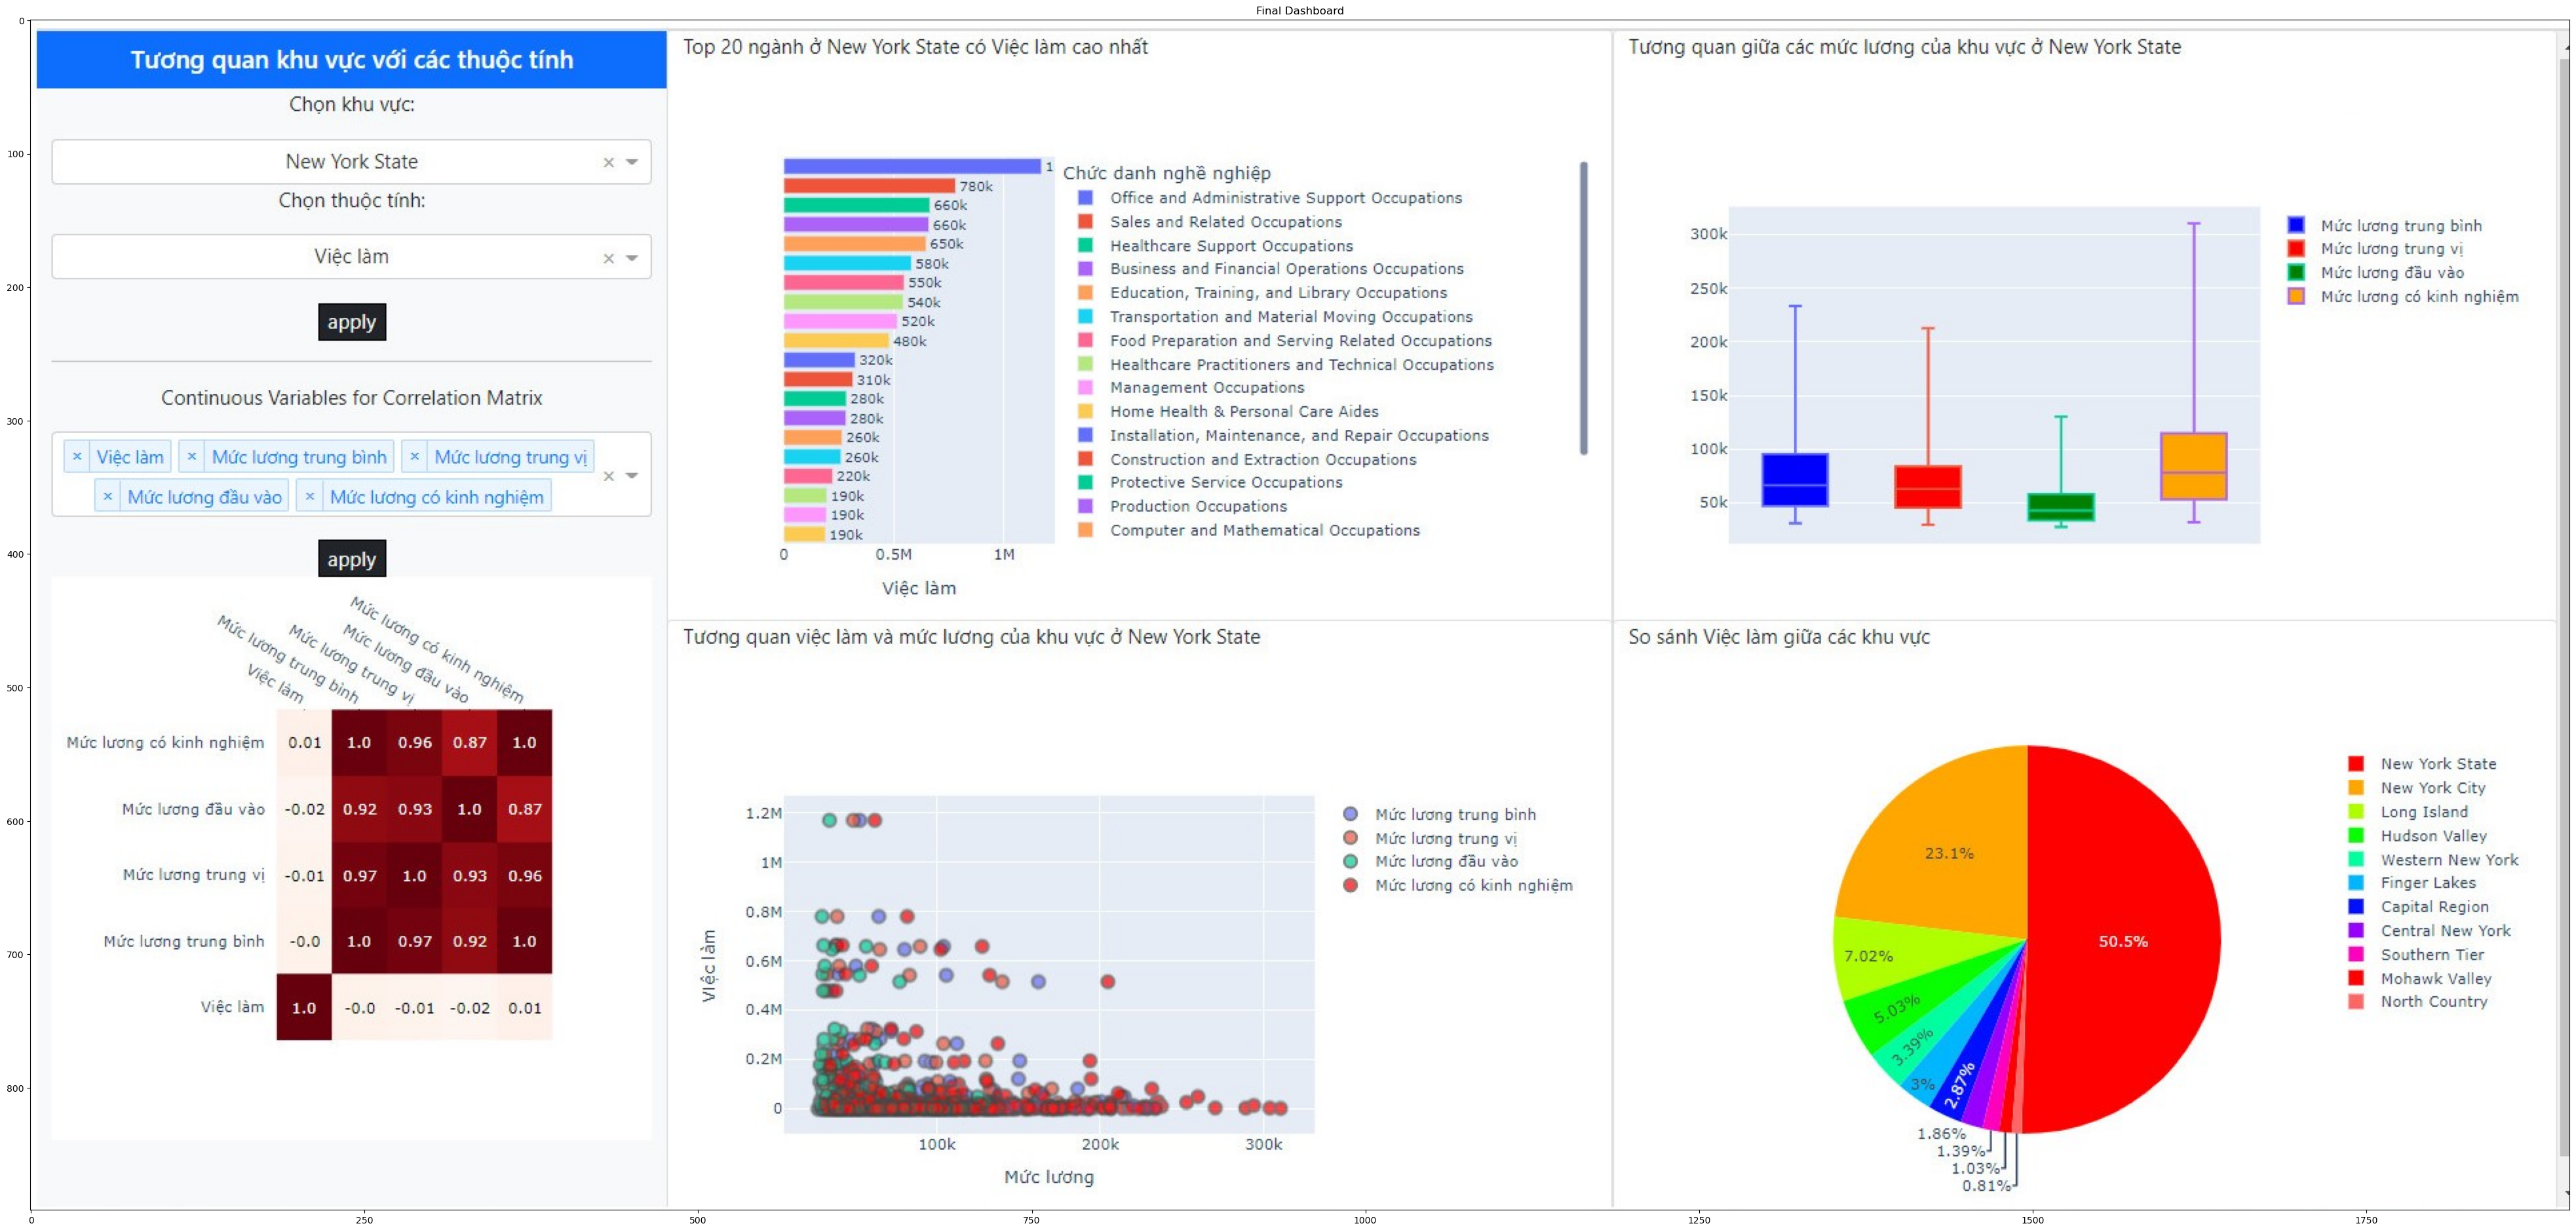

In [24]:
dashboard = cv2.imread('./dashboard.jpg')

fig = plt.figure(figsize = (50, 50))
ax1 = fig.subplots(1, 1)

ax1.imshow(cv2.cvtColor(dashboard, cv2.COLOR_RGB2BGR), cmap = 'gray')
ax1.set_title('Final Dashboard');

## Kết luận

Do mỗi máy có một kích thước mặc định trang web khác nhau nên trang Dashboard của nhóm gặp vấn đề bị co giãn gây mất các chi tiết. Cách khắc phục tạm thời là phóng to hoặc thu nhỏ trang web lại để các biểu đồ hiển thị đầy đủ các chi tiết.

# Cảm ơn thầy và các bạn đã xem!!!!!!!!!!